In [21]:
# 1) Import required modules
import pandas as pd
#from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
os.chdir("C:\\Users\\risin\\OneDrive\\Desktop\\jigsaw academy\\ZC. Public Projects_Kaggle_Github\\2. House Prices_Adv_Regression\Data sets")

In [22]:
# 1a) Ignore depriciation & future warnings
def suppress_warnings():
    import warnings
    warnings.filterwarnings('ignore', category = DepriciationWarning)
    warnings.filterwarnings('ignore', category = FutureWarning)

In [23]:
# 2) Read & Preview data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
display("train data-")
display(train.shape)
display("test data-")
display(test.shape)
#Our task is to find house prices in Ames of the test set by learning from the train set using 81 predictor variables

'train data-'

(1460, 81)

'test data-'

(1459, 80)

In [24]:
# 3) Concatenate train & test 
merge=pd.concat([train,test],sort = False)
display(merge.head(2))
display(merge.shape)
# Total 81 variables & 2919 observations
# Dependent/Target variable - SalePrice
# Independent/Predictor varibales - Rest all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0


(2919, 81)

In [25]:
##4) All variables & data types
display(merge.dtypes.value_counts())
display(merge.columns)
## 38 Numerical variables & 43 categorical variables

object     43
int64      26
float64    12
dtype: int64

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
## 5a) Extracting numerical variables only
merge_num=merge.select_dtypes(include=['int64','float64'])
display(merge_num.columns)

##Histogram of numerical variables to validate pandas intuition

##After going through data_description.txt, found that some of the variables have data type mismatch
##Hence, changing the data type to categorical from int64
merge.loc[:,['MSSubClass','OverallQual','OverallCond','MoSold','YrSold']]=merge.loc[:,['MSSubClass','OverallQual','OverallCond','MoSold','YrSold']].astype('object')
display(merge.dtypes.value_counts())

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

object     48
int64      21
float64    12
dtype: int64

In [27]:
## 5b) Extracting train & test data from the combined data set 'merge'
df_train=merge.iloc[:1460,:].drop(columns=['Id'],axis=1)
df_test=merge.iloc[1460:,:].drop(columns=['Id','SalePrice'],axis=1)
display(df_train.shape)
df_test.shape

(1460, 80)

(1459, 79)

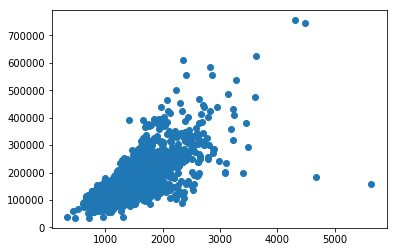

(1456, 80)

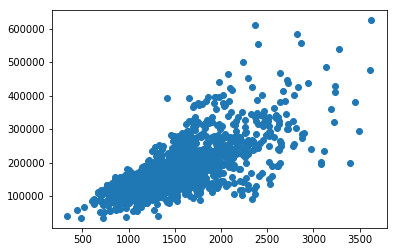

In [28]:
## 6) Outliers treatment
## Note from author to remove houses with more than 4000 sq ft against GrLivArea

## Plotting scatterplot of GrLivArea vs SalePrice to check outliers
plt.scatter(x=df_train['GrLivArea'],y=df_train['SalePrice'])
plt.show()

##Dropping observations where GrLivArea > 4000
df_train.drop(df_train[df_train.GrLivArea>4000].index,inplace=True)
df_train.reset_index(drop=True,inplace=True)
display(df_train.shape)

plt.scatter(x=df_train['GrLivArea'],y=df_train['SalePrice'])
plt.show()

In [29]:
## 7) Missing value imputation
## 1st method -
## 1a)Categorical variables - replace with mode
## 1b)Numerical variables - replace with mean(if normal distribution:Age), with median (if skewed:Fare)

## 2nd method -  Above method invlolve biasness, so another way :
## 2a)group the data by some variables that have no NA's & for each subset compute with median
## 2b)build linear regression model that will predict NA's using features that have no NA's

## by using 2a)
## if 1 or 2 missing NA, use 1st method
## if more NA, use 2nd method - find out which variables have strong relation - using correlation

y_train=df_train.SalePrice 
df_train.drop('SalePrice', axis=1, inplace=True) 
df_merge=pd.concat([df_train, df_test], axis=0) 
df_merge.isnull().sum()
missing_columns=df_merge.columns[df_merge.isnull().any()].values    ##List of variables having NA's 
total_columns=np.count_nonzero(df_merge.isna().sum()) ## Count of total variables having NA's 
missing_columns=len(df_merge)-df_merge.loc[:,np.sum(df_merge.isnull())>0].count() 
missing_columns

##Categorical : 
##Alley(2717),PoolQC(2907),Fence(2345),MiscFeature(2810),FirePlaceQu(1420),
##MasVnrType(24),BsmtQual(81),BsmtCond(82),GarageType(157),GarageFinish(159),GarageQual(159),GarageCond(159),
##BsmtExposure(82),BsmtFinType1(79),BsmtFinType2(80),
##MSZoning(4),Utilities(2),Exterior1st(1),Exterior2nd(1),Electrical(1),KitchenQual(1),Functional(2),SaleType(1),
##Numerical :
##MasVnrArea(23),BsmtFinSF1(1),BsmtFinSF2(1),BsmtUnfSF(1),TotalBsmtSF(1),BsmtFullBath(2),
##BsmtHalfBath(2),GarageYrBlt(159),GarageCars(1),GarageArea(1),##LotFrontage(486)

MSZoning           4
LotFrontage      486
Alley           2717
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2907
Fence           2345
MiscFeature     2810
SaleType           1
dtype: int64

In [30]:
##Following Categorical variables have more than 40% NA's-Usually we ignore them, but documenetation says that NA implies 'None'
##So, changing all NA's to 'None' category

##Alley(2717),PoolQC(2907),Fence(2345),MiscFeature(2810),FirePlaceQu(1420),
##MasVnrType(24),BsmtQual(81),BsmtCond(82),GarageType(157),GarageFinish(159),GarageQual(159),GarageCond(159),
##BsmtExposure(82),BsmtFinType1(79),BsmtFinType2(80),


#df_merge['Alley'].value_counts()
#df_merge['Alley'].head()
df_merge['Alley'].fillna(value='None',inplace=True)

#df_merge['PoolQC'].value_counts()
#df_merge['PoolQC'].head(10)
df_merge['PoolQC'].fillna(value='None',inplace=True)

#df_merge['Fence'].value_counts()
#df_merge['Fence'].head(10)
df_merge['Fence'].fillna(value='None',inplace=True)

#df_merge['MiscFeature'].value_counts()
#df_merge['MiscFeature'].head(10)
df_merge['MiscFeature'].fillna(value='None',inplace=True)

#df_merge['FireplaceQu'].value_counts()
#df_merge['FireplaceQu'].head(10)
df_merge['FireplaceQu'].fillna(value='None',inplace=True)

df_merge['MasVnrType'].fillna(value='None',inplace=True)
df_merge['BsmtQual'].fillna(value='None',inplace=True)
df_merge['BsmtCond'].fillna(value='None',inplace=True)
df_merge['GarageType'].fillna(value='None',inplace=True)
df_merge['GarageFinish'].fillna(value='None',inplace=True)
df_merge['GarageQual'].fillna(value='None',inplace=True)
df_merge['GarageCond'].fillna(value='None',inplace=True)
df_merge['BsmtExposure'].fillna(value='None',inplace=True)
df_merge['BsmtFinType1'].fillna(value='None',inplace=True)
df_merge['BsmtFinType2'].fillna(value='None',inplace=True)

In [31]:
##In the following Categorical variables(very few NA's), NA's will be replaced by 'mode' - the higher occurence of value
##MSZoning(4),Utilities(2),Exterior1st(1),Exterior2nd(1),Electrical(1),KitchenQual(1),Functional(2),SaleType(1),

df_merge['MSZoning'].value_counts()
df_merge['MSZoning'].fillna(value='RL',inplace=True)

df_merge['Utilities'].value_counts()
df_merge['Utilities'].fillna(value='AllPub',inplace=True)

df_merge['Exterior1st'].value_counts()
df_merge['Exterior1st'].fillna(value='VinylSd',inplace=True)

df_merge['Exterior2nd'].value_counts()
df_merge['Exterior2nd'].fillna(value='VinylSd',inplace=True)

df_merge['Electrical'].value_counts()
df_merge['Electrical'].fillna(value='SBrkr',inplace=True)

df_merge['KitchenQual'].value_counts()
#df_merge['KitchenQual'].fillna(value='TA',inplace=True)
#or
df_merge['KitchenQual'].fillna(df_merge['KitchenQual'].mode()[0],inplace=True)

df_merge['Functional'].value_counts()
df_merge['Functional'].fillna(df_merge['Functional'].mode()[0],inplace=True)

df_merge['SaleType'].value_counts()
df_merge['SaleType'].fillna(df_merge['SaleType'].mode()[0],inplace=True)

In [32]:
##Following Numerical variables are either discrete or continuous - will be imputed by mean or median
##I am imputing Na's with median
##Numerical-MasVnrArea(23),BsmtFinSF1(1),BsmtFinSF2(1),BsmtUnfSF(1),TotalBsmtSF(1),BsmtFullBath(2),
##          BsmtHalfBath(2),GarageYrBlt(159),GarageCars(1),GarageArea(1)
##          LotFrontage(486),

#df_merge['MasVnrArea'].value_counts()
df_merge['MasVnrArea'].fillna(df_merge['MasVnrArea'].median(),inplace=True)
df_merge['BsmtFinSF1'].fillna(df_merge['BsmtFinSF1'].median(),inplace=True)
df_merge['BsmtFinSF2'].fillna(df_merge['BsmtFinSF2'].median(),inplace=True)
df_merge['BsmtUnfSF'].fillna(df_merge['BsmtUnfSF'].median(),inplace=True)
df_merge['TotalBsmtSF'].fillna(df_merge['TotalBsmtSF'].median(),inplace=True)
df_merge['BsmtFullBath'].fillna(df_merge['BsmtFullBath'].median(),inplace=True)
df_merge['BsmtHalfBath'].fillna(df_merge['BsmtHalfBath'].median(),inplace=True)
df_merge['GarageYrBlt'].fillna(df_merge['GarageYrBlt'].median(),inplace=True)
df_merge['GarageCars'].fillna(df_merge['GarageCars'].median(),inplace=True)
df_merge['GarageArea'].fillna(df_merge['GarageArea'].median(),inplace=True)

In [33]:
##Which variables left having NA's
df_merge.columns[df_merge.isna().any()].values

array(['LotFrontage'], dtype=object)

In [34]:
##Numerical Variable - 'LotFrontage' has many missing values. So, finding out the strong correlation with other variables
##& will calculate the median of that high correlate variable & impute NA of LotFrontage with that value

## Correlation heatmap (LotFrontage)

from sklearn.preprocessing import LabelEncoder
#correlation=df_merge.loc[:, ['OverallQual','RoofStyle','Exterior2nd','Neighborhood','GarageType','MSSubClass','BldgType','Utilities']]
correlation=df_merge.select_dtypes(include=['object'])
#assign all column names to correlation
correlation=correlation.agg(LabelEncoder().fit_transform) #convert categorical into numerical
correlation['LotFrontage']=df_merge.LotFrontage #insert LotFrontage in variable correlation
#correlation=correlation.set_index('Age').reset_index() #move age at index 0
corr=correlation.corr()
display(corr['LotFrontage'].sort_values(ascending=False)[:5])
display(corr['LotFrontage'].sort_values(ascending=False)[-5:])
#plt.figure(figsize=(15,6))
#sns.heatmap(correlation.corr(),cmap='BrBG',annot=True,linewidth=.5)
#plt.title('Variables correlated with Correlation')
#plt.show()

##BldgType has the highest correlation with LotFrontage

LotFrontage     1.000000
OverallQual     0.204049
RoofStyle       0.180168
Exterior2nd     0.130137
Neighborhood    0.124097
Name: LotFrontage, dtype: float64

LotConfig    -0.191358
GarageType   -0.294884
MSSubClass   -0.396307
BldgType     -0.485279
Utilities          NaN
Name: LotFrontage, dtype: float64

In [35]:
##Imputing NA's of LotFrontage with the median of 'BldgType'
df_merge['LotFrontage']=df_merge.groupby(['BldgType'])['LotFrontage'].transform(lambda x:x.fillna(x.median()))
print('Any missing values left -' , df_merge.columns[df_merge.isna().any()].values)

Any missing values left - []


'SalePrice without Transformation (skewness: )'

1.5659592925562151

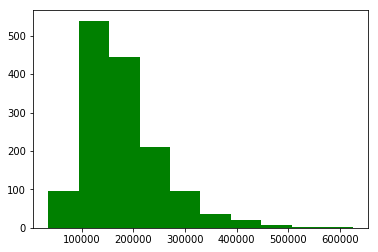

'Distribution of Sale Price after removing skewness'

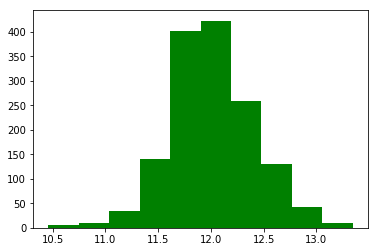

In [36]:
##8)Transformation of Distributions
##Since most of the variables are positively skewed, we would apply log transformation on them

display('SalePrice without Transformation (skewness: )', y_train.skew())
y_train.hist(color='g',grid=False)
plt.show()

display('Distribution of Sale Price after removing skewness')
y_train=np.log1p(y_train)
y_train.hist(color='g',grid=False)

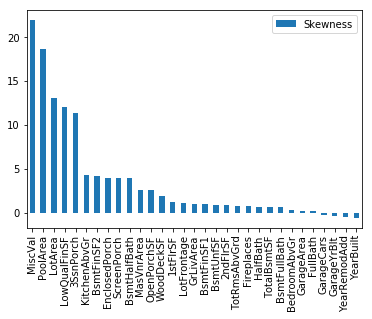

In [37]:
##Calculating & Plotting the skewness of other numerical variables
skew_merge=pd.DataFrame(data=df_merge.select_dtypes(include=['int64','float64']).skew(), columns=['Skewness'])
skew_merge_sorted=skew_merge.sort_values(ascending=False, by='Skewness')
skew_merge_sorted.plot.bar()

In [38]:
##Transforming only those numerical variables that have skewness greater than 0.75
df_merge_num=df_merge.select_dtypes(include=['int64','float64'])
display('Features to be transformed (skewness > 0.75) - ')
display(df_merge_num.skew()[df_merge_num.skew()>0.75].index.values)

'Features to be transformed (skewness > 0.75) - '

array(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype=object)

In [39]:
##Applying the transformation
df_merge_skew=np.log1p(df_merge_num[df_merge_num.skew()[df_merge_num.skew()>0.75].index])
#display(df_merge_skew.head())
##Normal variables
df_merge_normal=df_merge_num[df_merge_num.skew()[df_merge_num.skew()<0.75].index]
#display(df_merge_normal.head())
df_merge_num_all=pd.concat([df_merge_skew,df_merge_normal],axis=1)
display(df_merge_num_all.head())
##Updating numerical variables with tranformed variables
df_merge_num.update(df_merge_num_all)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,TotalBsmtSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.751101,0.0,7.444833,...,856.0,1.0,2,1,3,8,0,2003.0,2.0,548.0
1,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,0.000000,0.0,7.141245,...,1262.0,0.0,2,0,3,6,1,1976.0,2.0,460.0
2,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.765039,0.0,7.488294,...,920.0,1.0,2,1,3,6,1,2001.0,2.0,608.0
3,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.869014,6.629363,0.0,7.448916,...,756.0,1.0,1,0,3,7,1,1998.0,3.0,642.0
4,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,6.960348,0.0,7.695758,...,1145.0,1.0,2,1,4,9,1,2000.0,3.0,836.0


D:\software\lib\site-packages\pandas\core\frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


In [40]:
##9)Bivariate analysis - Dependent vs Independent: any combination of categorical & numerical variables
# 1)Numerical vs Numerical: Scatterplot to check  how strong the correlation is
# 2)Numerical vs Categorical : Boxplot & then Mean SalePrice across groups of Categorical variables
## Will analyse on top 20 variables that are highly +vely or -vely correlated

from sklearn.preprocessing import LabelEncoder
df_corr=pd.concat([df_merge.iloc[0:1456,:],y_train],axis=1)
df_corr=df_corr.agg(LabelEncoder().fit_transform)
df_corr=df_corr.corr()
display('Best 10 +vely correlated variables are - ')
display(df_corr['SalePrice'].sort_values(ascending=False)[:11])
display('Best 10 -vely correlated variables are - ')
display(df_corr['SalePrice'].sort_values(ascending=False)[-10:])

'Best 10 +vely correlated variables are - '

SalePrice       1.000000
OverallQual     0.819885
GrLivArea       0.737118
GarageCars      0.680034
GarageArea      0.664054
TotalBsmtSF     0.633474
YearBuilt       0.618314
FullBath        0.616308
1stFlrSF        0.599499
YearRemodAdd    0.580152
GarageYrBlt     0.532280
Name: SalePrice, dtype: float64

'Best 10 -vely correlated variables are - '

KitchenAbvGr   -0.161072
MSZoning       -0.232167
LotShape       -0.292313
BsmtExposure   -0.303445
HeatingQC      -0.448559
GarageFinish   -0.449363
GarageType     -0.513152
KitchenQual    -0.554800
BsmtQual       -0.598646
ExterQual      -0.611179
Name: SalePrice, dtype: float64

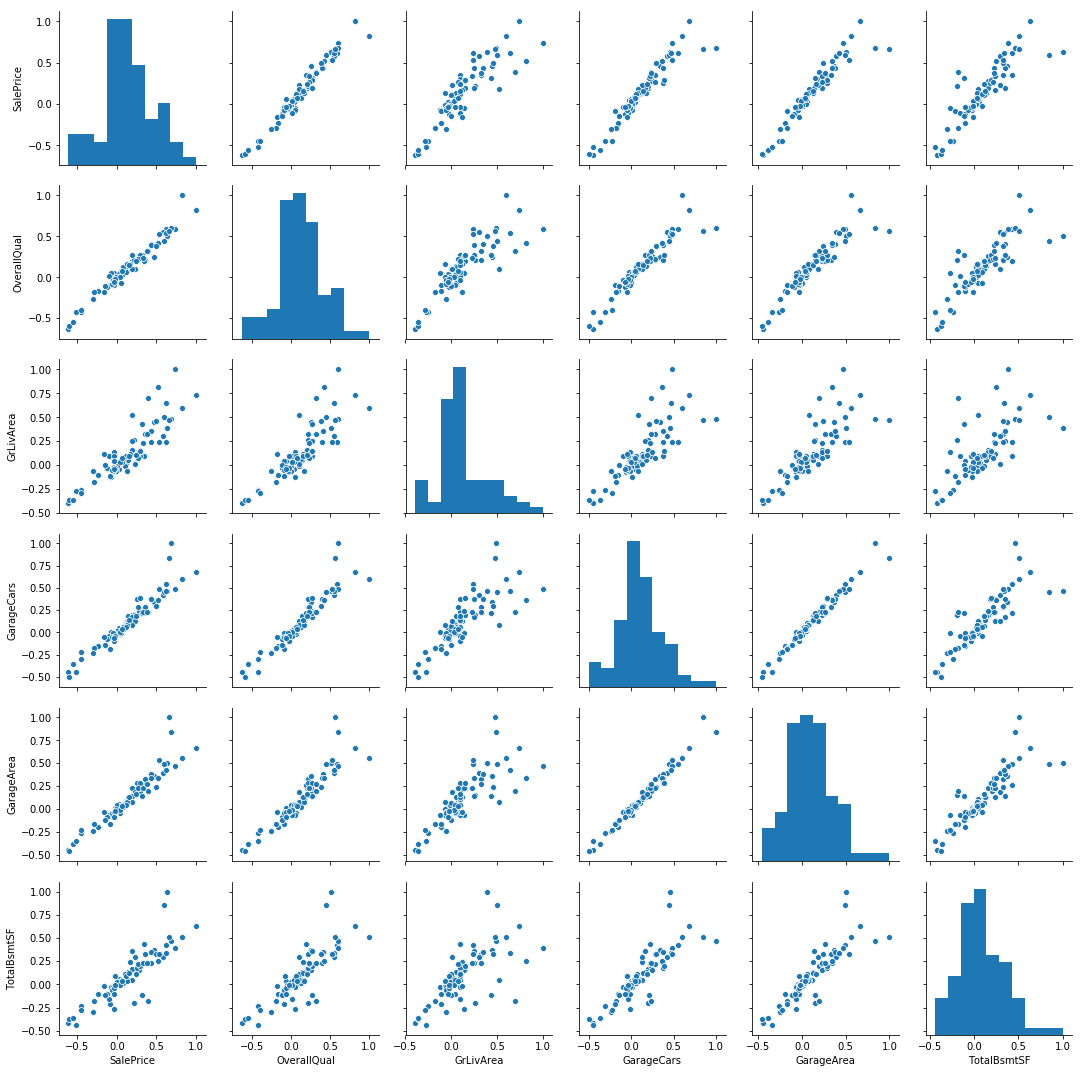

In [21]:
##Scatterplot of +vely correlated variables (top5) with SalePrice
corr_positive=df_corr.loc[:,['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']]
sns.pairplot(corr_positive)

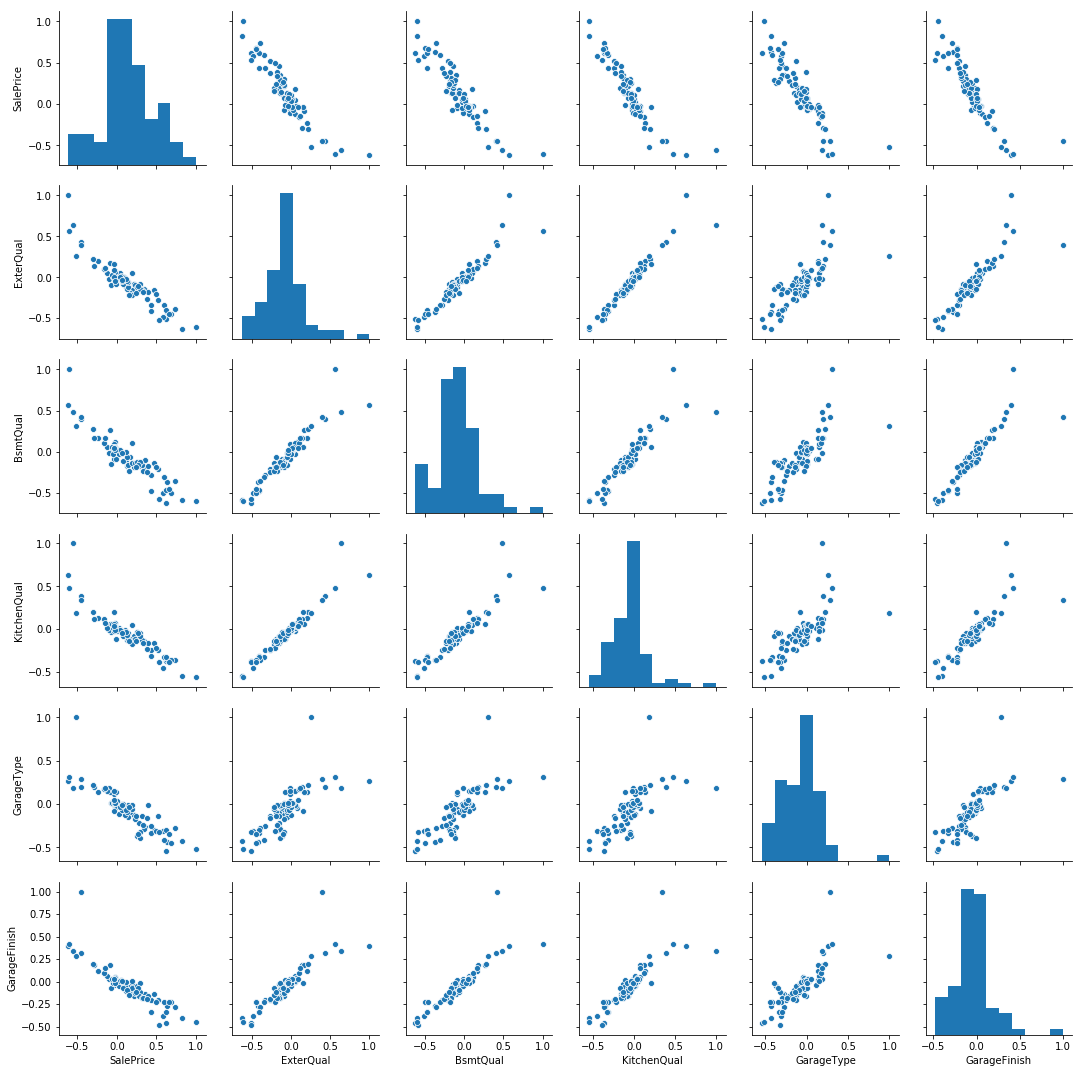

In [22]:
##Scatterplot of -vely correlated variables (top5) with SalePrice
corr_negative=df_corr.loc[:,['SalePrice','ExterQual','BsmtQual','KitchenQual','GarageType','GarageFinish']]
sns.pairplot(corr_negative)

'Scatter plot between GrLivArea & SalePrice'

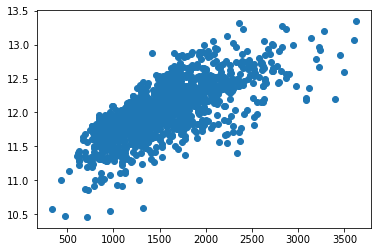

In [41]:
##9.1)Numerical & Numerical Variable
##Among top 20 strong correlated variables, following are continuous numerical variables-
##GrLivArea,Yearbuilt, GarageArea, TotalBsmtSF, 1stFlrSF, YearRemoteAdd, GarageYrBlt
##Checking the relationshipt between these variables & Sale Price

#display(y_train.head())
#df_merge.head()
y_train=pd.DataFrame(y_train)
display('Scatter plot between GrLivArea & SalePrice')
plt.scatter(x=df_train['GrLivArea'],y=y_train)
plt.show()
#GarageCars,KitchenAbvGr,FullBath - these are also continuous numerical variables

'Scatter plot between YearBuilt & SalePrice'

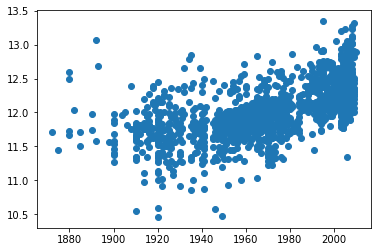

In [52]:
display('Scatter plot between YearBuilt & SalePrice')
plt.scatter(x=df_train['YearBuilt'],y=y_train)
plt.show()

'Scatter plot between GarageArea & SalePrice'

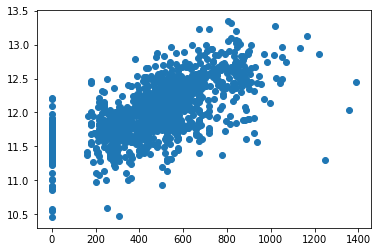

In [68]:
display('Scatter plot between GarageArea & SalePrice')
plt.scatter(x=df_train['GarageArea'],y=y_train)
plt.show()

'Scatter plot between TotalBsmtSF & SalePrice'

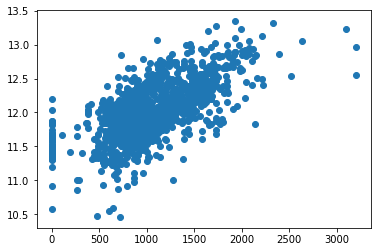

In [54]:
display('Scatter plot between TotalBsmtSF & SalePrice')
plt.scatter(x=df_train['TotalBsmtSF'],y=y_train)
plt.show()

'Scatter plot between 1stFlrSF & SalePrice'

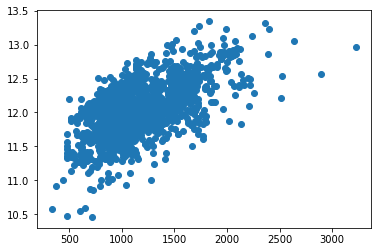

In [55]:
display('Scatter plot between 1stFlrSF & SalePrice')
plt.scatter(x=df_train['1stFlrSF'],y=y_train)
plt.show()

'Scatter plot between YearRemodAdd & SalePrice'

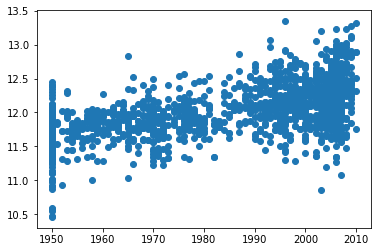

In [56]:
display('Scatter plot between YearRemodAdd & SalePrice')
plt.scatter(x=df_train['YearRemodAdd'],y=y_train)
plt.show()

'Scatter plot between GarageYrBlt & SalePrice'

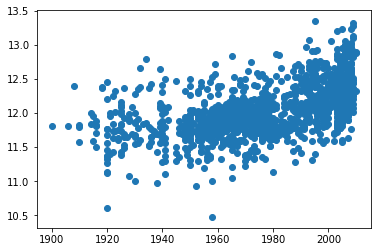

In [57]:
display('Scatter plot between GarageYrBlt & SalePrice')
plt.scatter(x=df_train['GarageYrBlt'],y=y_train)
plt.show()

Text(0.5, 1.0, 'Association between Sale Price & OverallQual')

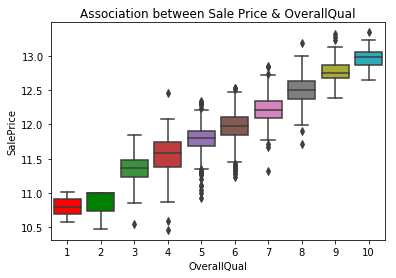

In [69]:
##9.2)Categorical & Numerical Variables
##Among these 20, following are categorical variables & will check the boxplot between these & SalePrice-
##OverallQual, GarageCars, FullBath, ExterQual, BsmtQual, KitchenQual, GarageType, GarageFinish, HeatingQC, BsmtExposure,
##LotShape, MSZoning, KitchenAbvGr

#display(y_train['SalePrice'].shape)
#display(df_train['OverallQual'].shape)
ax=sns.boxplot(x=df_train['OverallQual'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & OverallQual')

Text(0.5, 1.0, 'Association between Sale Price & GarageCars')

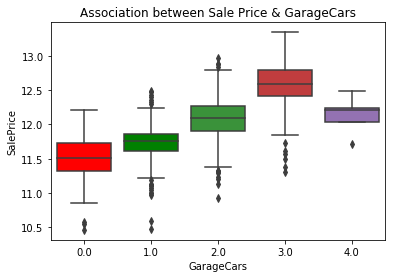

In [59]:
ax=sns.boxplot(x=df_train['GarageCars'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & GarageCars')

Text(0.5, 1.0, 'Association between Sale Price & FullBath')

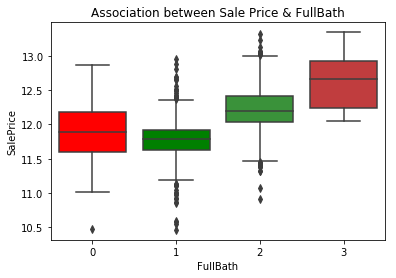

In [60]:
ax=sns.boxplot(x=df_train['FullBath'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & FullBath')

Text(0.5, 1.0, 'Association between Sale Price & ExterQual')

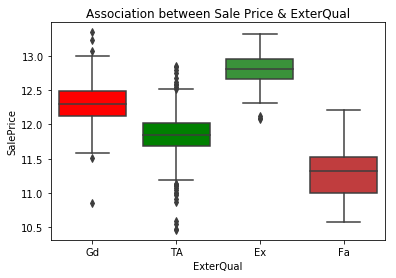

In [61]:
ax=sns.boxplot(x=df_train['ExterQual'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & ExterQual')

Text(0.5, 1.0, 'Association between Sale Price & BsmtQual')

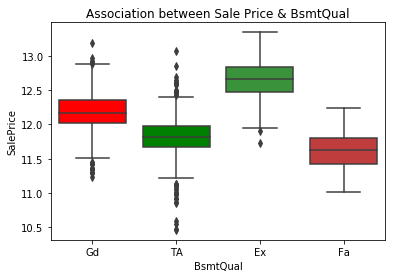

In [62]:
ax=sns.boxplot(x=df_train['BsmtQual'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & BsmtQual')

Text(0.5, 1.0, 'Association between Sale Price & KitchenQual')

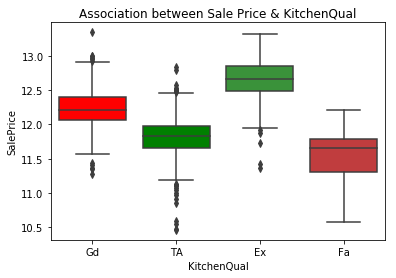

In [63]:
ax=sns.boxplot(x=df_train['KitchenQual'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & KitchenQual')

Text(0.5, 1.0, 'Association between Sale Price & GarageType')

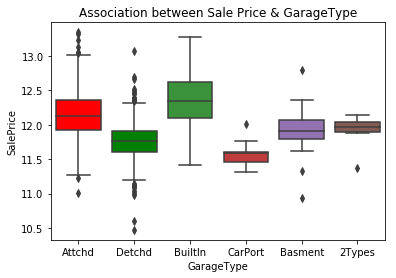

In [65]:
ax=sns.boxplot(x=df_train['GarageType'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & GarageType')

Text(0.5, 1.0, 'Association between Sale Price & GarageFinish')

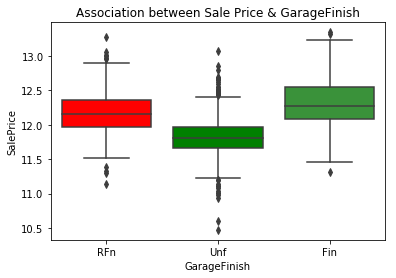

In [66]:
ax=sns.boxplot(x=df_train['GarageFinish'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & GarageFinish')

Text(0.5, 1.0, 'Association between Sale Price & HeatingQC')

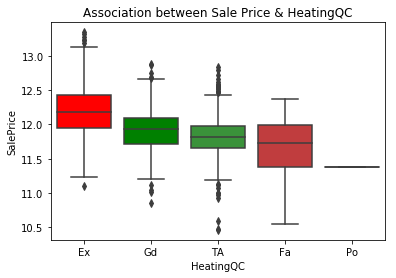

In [67]:
ax=sns.boxplot(x=df_train['HeatingQC'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & HeatingQC')

Text(0.5, 1.0, 'Association between Sale Price & BsmtExposure')

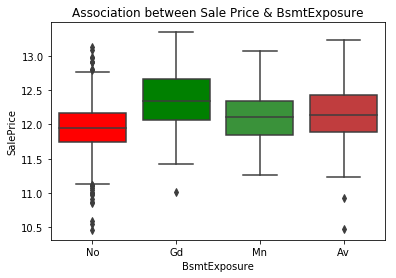

In [68]:
ax=sns.boxplot(x=df_train['BsmtExposure'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & BsmtExposure')

Text(0.5, 1.0, 'Association between Sale Price & LotShape')

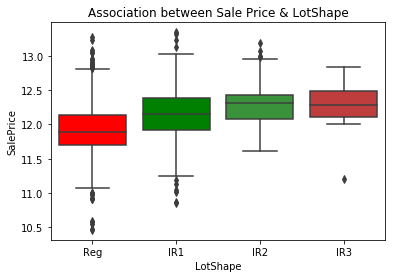

In [69]:
ax=sns.boxplot(x=df_train['LotShape'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & LotShape')

Text(0.5, 1.0, 'Association between Sale Price & MSZoning')

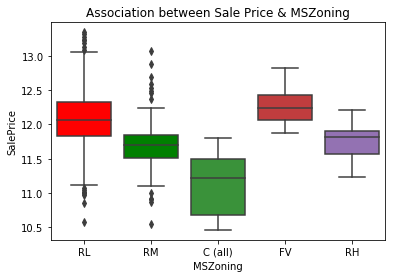

In [70]:
ax=sns.boxplot(x=df_train['MSZoning'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & MSZoning')

Text(0.5, 1.0, 'Association between Sale Price & KitchenAbvGr')

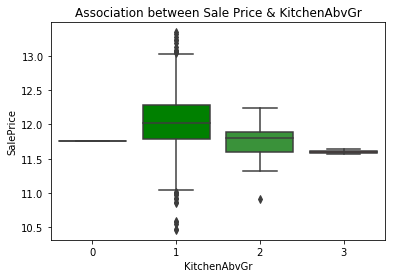

In [71]:
ax=sns.boxplot(x=df_train['KitchenAbvGr'],y=y_train['SalePrice'])
box=ax.artists[0]
box1=ax.artists[1]
box.set_facecolor('red')
box1.set_facecolor('green')
plt.title('Association between Sale Price & KitchenAbvGr')

##All these variables are highly associated with Sale Price which means --
##--that 'Mean SalePrice' is distinct across groups 
##will calculate Mean SalePrice & see -

Text(0, 0.5, 'Mean SalePrice')

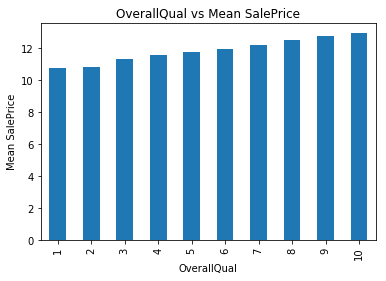

In [70]:
#Calc Mean & plot it
Mean_values=round(y_train['SalePrice'].groupby(df_train['OverallQual']).mean(),2)
Mean_values.plot.bar()
plt.title('OverallQual vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

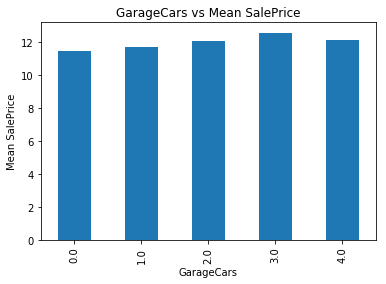

In [73]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['GarageCars']).mean(),2)
Mean_values.plot.bar()
plt.title('GarageCars vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

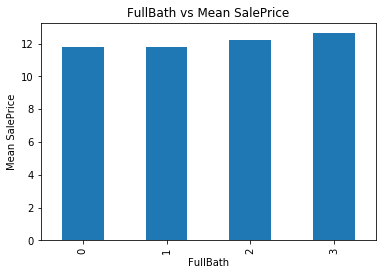

In [74]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['FullBath']).mean(),2)
Mean_values.plot.bar()
plt.title('FullBath vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

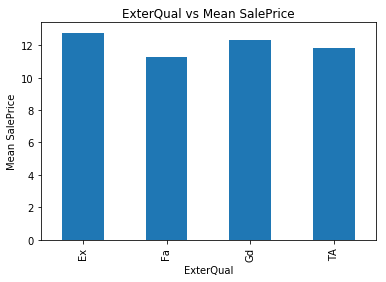

In [75]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['ExterQual']).mean(),2)
Mean_values.plot.bar()
plt.title('ExterQual vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

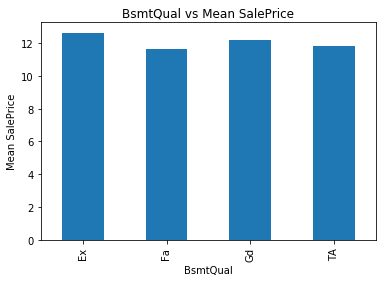

In [76]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['BsmtQual']).mean(),2)
Mean_values.plot.bar()
plt.title('BsmtQual vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

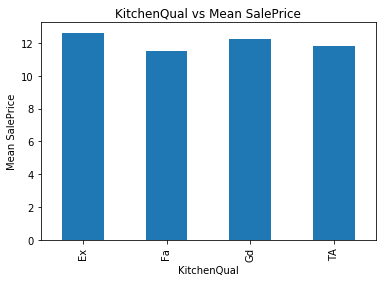

In [77]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['KitchenQual']).mean(),2)
Mean_values.plot.bar()
plt.title('KitchenQual vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

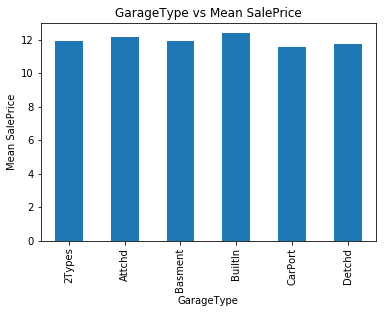

In [78]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['GarageType']).mean(),2)
Mean_values.plot.bar()
plt.title('GarageType vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

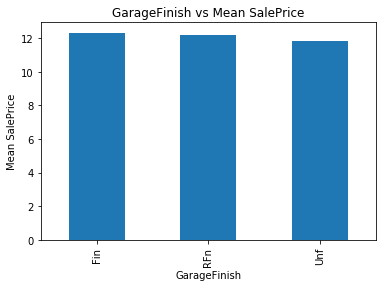

In [79]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['GarageFinish']).mean(),2)
Mean_values.plot.bar()
plt.title('GarageFinish vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

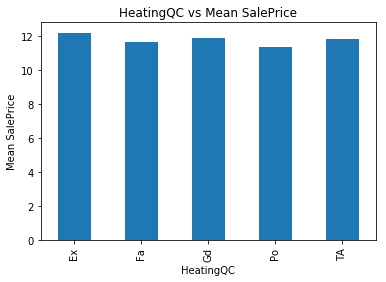

In [80]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['HeatingQC']).mean(),2)
Mean_values.plot.bar()
plt.title('HeatingQC vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

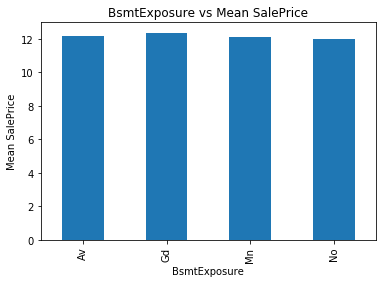

In [81]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['BsmtExposure']).mean(),2)
Mean_values.plot.bar()
plt.title('BsmtExposure vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

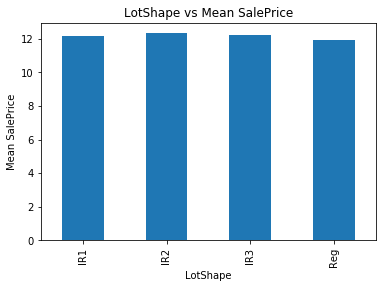

In [82]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['LotShape']).mean(),2)
Mean_values.plot.bar()
plt.title('LotShape vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

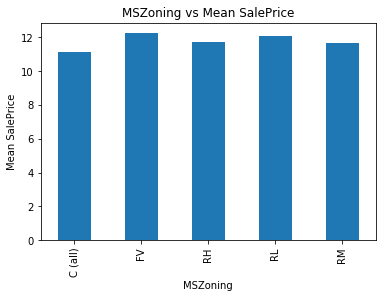

In [84]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['MSZoning']).mean(),2)
Mean_values.plot.bar()
plt.title('MSZoning vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

Text(0, 0.5, 'Mean SalePrice')

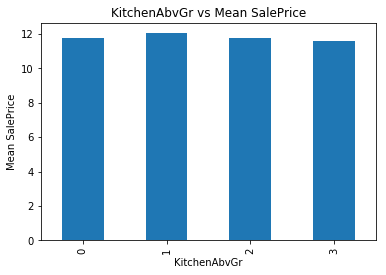

In [85]:
Mean_values=round(y_train['SalePrice'].groupby(df_train['KitchenAbvGr']).mean(),2)
Mean_values.plot.bar()
plt.title('KitchenAbvGr vs Mean SalePrice')
plt.ylabel('Mean SalePrice')

In [42]:
##10)Feature Engineering
##10.1) TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF
df_merge_num['TotalSF']=df_merge_num['TotalBsmtSF']+df_merge_num['1stFlrSF']+df_merge_num['2ndFlrSF']

##10.2) Feature Scaling - 2 methods are used : Normalization & Standardization
##Normalization scales all numeric variables in the range [0,1). So outliers might be lost.
##Standardization transforms data to have zero mean & unit variance.
from sklearn.preprocessing import RobustScaler
robust_scl = RobustScaler()  ##Initialize robust scaler object
robust_scl.fit(df_merge_num)  ##Fit scaler object on train data
df_merge_num_scaled = robust_scl.transform(df_merge_num)  ##Apply scaler object 
df_merge_num_scaled=pd.DataFrame(data=df_merge_num_scaled,columns=df_merge_num.columns,index=df_merge_num.index)
df_merge_num_scaled.head()

##10.3) Encoding Categorical variables - Label Encoding & One Hot Encoding 
##10.3.1) Label Encoding- Only those categorical variables for whom order is important (ordinal)
##10.3.2) One Hot Encoding - Remaining categorical variables (order is not important)
## Following are the categorical variables -
df_merge_cat1=df_merge.select_dtypes(include=['object']).columns
display(df_merge_cat1)
df_merge_cat=df_merge.select_dtypes(include=['object']).astype('category')

D:\software\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [43]:
##Label Encoding -

display(df_merge_cat['LotShape'].unique())
df_merge_cat['LotShape'].replace(to_replace=('IR1','IR2','IR3','Reg'), value=[0,1,2,3],inplace=True)
df_merge_cat['LotShape'].unique()

display(df_merge_cat['LandContour'].unique())
df_merge_cat['LandContour'].replace(to_replace=('Low','Bnk','HLS','Lvl'), value=[0,1,2,3],inplace=True)
df_merge_cat['LandContour'].unique()

display(df_merge_cat['Utilities'].unique())
df_merge_cat['Utilities'].replace(to_replace=('NoSewa','AllPub'), value=[0,1],inplace=True)
df_merge_cat['Utilities'].unique()

display(df_merge_cat['LandSlope'].unique())
df_merge_cat['LandSlope'].replace(to_replace=('Sev','Mod','Gtl'), value=[0,1,2],inplace=True)
df_merge_cat['LandSlope'].unique()

display(df_merge_cat['ExterQual'].unique())
df_merge_cat['ExterQual'].replace(to_replace=('Fa','TA','Gd','Ex'), value=[0,1,2,3],inplace=True)
df_merge_cat['ExterQual'].unique()

display(df_merge_cat['ExterCond'].unique())
df_merge_cat['ExterCond'].replace(to_replace=('Po','Fa','TA','Gd','Ex'), value=[0,1,2,3,4],inplace=True)
df_merge_cat['ExterCond'].unique()

display(df_merge_cat['BsmtQual'].unique())
df_merge_cat['BsmtQual'].replace(to_replace=('None','Fa','TA','Gd','Ex'), value=[0,1,2,3,4],inplace=True)
df_merge_cat['BsmtQual'].unique()

display(df_merge_cat['BsmtCond'].unique())
df_merge_cat['BsmtCond'].replace(to_replace=('None','Po','Fa','TA','Gd'), value=[0,1,2,3,4],inplace=True)
df_merge_cat['BsmtCond'].unique()

display(df_merge_cat['BsmtExposure'].unique())
df_merge_cat['BsmtExposure'].replace(to_replace=('None','No','Mn','Av','Gd'), value=[0,1,2,3,4],inplace=True)
df_merge_cat['BsmtExposure'].unique()

display(df_merge_cat['BsmtFinType1'].unique())
df_merge_cat['BsmtFinType1'].replace(to_replace=('None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'), value=[0,1,2,3,4,5,6],inplace=True)
df_merge_cat['BsmtFinType1'].unique()

display(df_merge_cat['BsmtFinType2'].unique())
df_merge_cat['BsmtFinType2'].replace(to_replace=('None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'), value=[0,1,2,3,4,5,6],inplace=True)
df_merge_cat['BsmtFinType2'].unique()

display(df_merge_cat['HeatingQC'].unique())
df_merge_cat['HeatingQC'].replace(to_replace=('Po','Fa','TA','Gd','Ex'), value=[0,1,2,3,4],inplace=True)
df_merge_cat['HeatingQC'].unique()

display(df_merge_cat['Electrical'].unique())
df_merge_cat['Electrical'].replace(to_replace=('Mix','FuseP','FuseF','FuseA','SBrkr'), value=[0,1,2,3,4],inplace=True)
df_merge_cat['Electrical'].unique()

display(df_merge_cat['KitchenQual'].unique())
df_merge_cat['KitchenQual'].replace(to_replace=('Fa','TA','Gd','Ex'), value=[0,1,2,3],inplace=True)
df_merge_cat['KitchenQual'].unique()

display(df_merge_cat['Functional'].unique())
df_merge_cat['Functional'].replace(to_replace=('Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'), value=[0,1,2,3,4,5,6],inplace=True)
df_merge_cat['Functional'].unique()

display(df_merge_cat['FireplaceQu'].unique())
df_merge_cat['FireplaceQu'].replace(to_replace=('None','Po','Fa','TA','Gd','Ex'), value=[0,1,2,3,4,5],inplace=True)
df_merge_cat['FireplaceQu'].unique()

display(df_merge_cat['GarageFinish'].unique())
df_merge_cat['GarageFinish'].replace(to_replace=('None','Unf','RFn','Fin'), value=[0,1,2,3],inplace=True)
df_merge_cat['GarageFinish'].unique()

display(df_merge_cat['GarageQual'].unique())
df_merge_cat['GarageQual'].replace(to_replace=('None','Po','Fa','TA','Gd','Ex'), value=[0,1,2,3,4,5],inplace=True)
df_merge_cat['GarageQual'].unique()

display(df_merge_cat['GarageCond'].unique())
df_merge_cat['GarageCond'].replace(to_replace=('None','Po','Fa','TA','Gd','Ex'), value=[0,1,2,3,4,5],inplace=True)
df_merge_cat['GarageCond'].unique()

display(df_merge_cat['PavedDrive'].unique())
df_merge_cat['PavedDrive'].replace(to_replace=('N','P','Y'), value=[0,1,2],inplace=True)
df_merge_cat['PavedDrive'].unique()

display(df_merge_cat['PoolQC'].unique())
df_merge_cat['PoolQC'].replace(to_replace=('None','Fa','Gd','Ex'), value=[0,1,2,3],inplace=True)
df_merge_cat['PoolQC'].unique()

display(df_merge_cat['Fence'].unique())
df_merge_cat['Fence'].replace(to_replace=('None','MnWw','GdWo','MnPrv','GdPrv'), value=[0,1,2,3,4],inplace=True)
df_merge_cat['Fence'].unique()

[Reg, IR1, IR2, IR3]
Categories (4, object): [Reg, IR1, IR2, IR3]

[Lvl, Bnk, Low, HLS]
Categories (4, object): [Lvl, Bnk, Low, HLS]

[AllPub, NoSeWa]
Categories (2, object): [AllPub, NoSeWa]

[Gtl, Mod, Sev]
Categories (3, object): [Gtl, Mod, Sev]

[Gd, TA, Ex, Fa]
Categories (4, object): [Gd, TA, Ex, Fa]

[TA, Gd, Fa, Po, Ex]
Categories (5, object): [TA, Gd, Fa, Po, Ex]

[Gd, TA, Ex, None, Fa]
Categories (5, object): [Gd, TA, Ex, None, Fa]

[TA, Gd, None, Fa, Po]
Categories (5, object): [TA, Gd, None, Fa, Po]

[No, Gd, Mn, Av, None]
Categories (5, object): [No, Gd, Mn, Av, None]

[GLQ, ALQ, Unf, Rec, BLQ, None, LwQ]
Categories (7, object): [GLQ, ALQ, Unf, Rec, BLQ, None, LwQ]

[Unf, BLQ, None, ALQ, Rec, LwQ, GLQ]
Categories (7, object): [Unf, BLQ, None, ALQ, Rec, LwQ, GLQ]

[Ex, Gd, TA, Fa, Po]
Categories (5, object): [Ex, Gd, TA, Fa, Po]

[SBrkr, FuseF, FuseA, FuseP, Mix]
Categories (5, object): [SBrkr, FuseF, FuseA, FuseP, Mix]

[Gd, TA, Ex, Fa]
Categories (4, object): [Gd, TA, Ex, Fa]

[Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]
Categories (7, object): [Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]

[None, TA, Gd, Fa, Ex, Po]
Categories (6, object): [None, TA, Gd, Fa, Ex, Po]

[RFn, Unf, Fin, None]
Categories (4, object): [RFn, Unf, Fin, None]

[TA, Fa, Gd, None, Ex, Po]
Categories (6, object): [TA, Fa, Gd, None, Ex, Po]

[TA, Fa, None, Gd, Po, Ex]
Categories (6, object): [TA, Fa, None, Gd, Po, Ex]

[Y, N, P]
Categories (3, object): [Y, N, P]

[None, Ex, Fa, Gd]
Categories (4, object): [None, Ex, Fa, Gd]

[None, MnPrv, GdWo, GdPrv, MnWw]
Categories (5, object): [None, MnPrv, GdWo, GdPrv, MnWw]

array([0, 3, 2, 4, 1], dtype=int64)

In [44]:
## One Hot Encoding -
df_merge_label_encoded = df_merge_cat.select_dtypes(include=['int64'])

df_merge_one_hot = df_merge_cat.select_dtypes(include=['category'])
display(df_merge_one_hot.columns)
df_merge_one_hot=pd.get_dummies(df_merge_one_hot)

##Concatenate one Hot & Label Encoded variables together
df_merge_encoded = pd.concat([df_merge_one_hot , df_merge_label_encoded], axis=1)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
       'GarageType', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [45]:
##Finally join processed categorical & numerical variables
df_merge_processed = pd.concat([df_merge_num_scaled, df_merge_encoded],axis=1)

##Final train & test data for modelling
df_train_final = df_merge_processed.iloc[0:1456,:]
df_test_final = df_merge_processed.iloc[1456:,:]

display(df_train_final.head(2))
display(df_test_final.head(2))
display(y_train.head(2))

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,-0.282415,-0.256741,0.6250,0.256410,1.036571,0.098563,0.0,-0.875494,-0.260355,-0.512612,...,4,2,6,0,2,3,3,2,0,0
1,0.509600,0.036150,0.0625,-0.435897,0.000000,0.147903,0.0,-0.383868,0.540434,0.336748,...,4,1,6,3,2,3,3,2,0,0


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,0.509600,0.474900,-0.2500,-0.820513,0.000000,0.036350,4.976734,-0.422852,-0.209073,-0.412702,...,4,1,6,0,1,3,3,2,0,3
1,0.557053,0.945595,-0.3125,-0.897436,0.920448,0.139138,0.000000,-0.108087,0.672584,0.449956,...,4,2,6,0,1,3,3,2,0,0


,SalePrice
0,12.247699
1,12.109016


In [46]:
##11) Model Building and Evaluation
## Ready Datasets for machine learning models
display(df_train_final.shape)
display(y_train.shape)
display(df_test_final.shape)

(1456, 264)

(1456, 1)

(1459, 264)

In [49]:
##11) Model Building and Evaluation
## 1) Training Model
## 1a) First, initialize all the regression objects

seed=43

## 1) Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)

## 2) Ridge 
from sklearn.linear_model import Ridge
ridge=Ridge(random_state=seed)

##3) Lasso 
from sklearn.linear_model import Lasso
lasso=Lasso(random_state=seed)

##4) ElasticNet 
from sklearn.linear_model import ElasticNet
elnt=ElasticNet(random_state=seed)

##5) KernelRidge 
from sklearn.kernel_ridge import KernelRidge
kr=KernelRidge()

## 6) Decision Tree Regressor
import sklearn.tree as tree
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = seed)

## 7) Support Vector Machines
from sklearn.svm import SVR
svm = SVR()

## 8) KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs=-1)
                         
## 9) Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state = seed)
                         
## 10) ExtraTrees Regressor
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_jobs=-1,random_state = seed)

## 11) AdaboostRegressor
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state = seed)

## 12) Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state = seed)

## 13) Extreme Gradient Boosting - getting error while running
#from xgboost import XGBRegressor
#xgb = XGBRegressor(n_jobs=-1,random_state = seed)

## 14) LGBM Regressor - not working as of now

In [50]:
##11) Model Building and Evaluation
## 1) Training Model
## 1b) Train accuracy of all models - By default, score method returns coefficient of determination (r_squared)

def train_accuracy (model):
    model.fit(df_train_final, y_train)
    train_accuracy = model.score(df_train_final, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy

train_accuracy=pd.DataFrame({'Model_Names' : [train_accuracy(lr), train_accuracy(lasso), train_accuracy(ridge), train_accuracy(kr), train_accuracy(elnt), train_accuracy(dtr), train_accuracy(svm), train_accuracy(knn), train_accuracy(rf), train_accuracy(etr), train_accuracy(abr), train_accuracy(gbr)]})
train_accuracy.index=['LR','LASSO','RIDGE','KR','ELNT','DTR','SVM','KNN','RF','ETR','ABR','GBR']
sorted_train_accuracy=train_accuracy.sort_values(by='Model_Names',ascending=False)
display('Training Score (R_Squared)')
display(sorted_train_accuracy) 

## Being a regression problem, score method returns r_squared(coefficients of determination) & hence bigger is better
## Decision Tree Regressor & Extra Trees Regressor have exactly r_squared of 100%
## Usually, highare r_squared is better but when it close to 1- this might indicate overfitting
## But,train accuracy is not enough to tell if amodel can able to generalize the unseen data (coz our model has already seen this train data)
## The purpose of building a machine learning model is to generalize the unseen data 
## Hence, can't use train accuracy for the model evaluation

D:\software\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\software\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\software\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
D:\software\lib\site-pa

'Training Score (R_Squared)'

,Model_Names
DTR,100.00
ETR,100.00
RF,97.60
GBR,95.57
LR,94.69
RIDGE,94.61
SVM,94.10
KR,92.94
KNN,86.50
ABR,84.43


In [51]:
##11) Model Building and Evaluation
## 2) Model Evaluation:The idea is to train & evaluate model performance on different data sets 
## Using train_test_split method & root mean squared error as the evaluation metric - smaller is better
## We can split train set in 2 groups - 80:20 ratio:train the model on 80% & reserve 20% for evaluation as we know ground truth for this 20% data
## Then, compare our model prediction with ground truth(for 20% data)

def train_test_split_score(model):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size=0.3, random_state=seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, Y_test)
    rmse = np.sqrt(mse)
    return rmse
    
train_test_split_score=pd.DataFrame({'Model_Names' : [train_test_split_score(lr),train_test_split_score(lasso),train_test_split_score(ridge),train_test_split_score(kr),train_test_split_score(elnt),train_test_split_score(dtr), train_test_split_score(svm), train_test_split_score(knn), train_test_split_score(rf), train_test_split_score(etr), train_test_split_score(abr), train_test_split_score(gbr)]})
train_test_split_score.index=['LR','LASSO','RIDGE','KR','ELNT','DTR','SVM','KNN','RF','ETR','ABR','GBR']
#train_test_split_score=train_test_split_score.round(5)
train_test_split_score=np.round(train_test_split_score*100,2)
sorted_train_test_split_score=train_test_split_score.sort_values(by='Model_Names',ascending=False)
display('Root Mean Sqaured Error -')
display(sorted_train_test_split_score)

## Being root mean squared error, smaller is better
## Ridge is the best regression model followed by SVM & GBR
## LR can't find any linear pattern. Hence it perfoms the worst & discarded

D:\software\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\software\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\software\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

'Root Mean Sqaured Error -'

,Model_Names
LR,3.441606e+10
LASSO,4.005000e+01
ELNT,4.005000e+01
DTR,2.077000e+01
KNN,1.807000e+01
ABR,1.718000e+01
KR,1.622000e+01
ETR,1.474000e+01
RF,1.473000e+01
GBR,1.294000e+01


In [ ]:
## As the train set gets larger, train_test_split has its advantage over k-fold cross validation
## Train_test_split is k-times faster than k-fold cross validation
## If training set is not so large, both performs identically
## So, for a large training data, train_test_split is preferred over k-fold cross validation to accelerate the training process

In [52]:
##11) Model Building and Evaluation
## 2) Model Evaluation - The idea is to train & evaluate model performance on different data sets 
## 2.1) K-Fold Cross validation - All data will be used for training & testing periodically
## k=10 & total 1456 observations. Each fold would have 1456/10=145.6 observations as the testing set & --
## -- k-1 = 9 folds as training sets & calcualtes test accuracy
## This procedure is repeated k(10) times , each time a different group of observations is treated as a validation/test set
##removing LR as per the last analysis

def x_val_score (model):
    from sklearn.model_selection import cross_val_score
    x_val_score = cross_val_score(model, df_train_final, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error').mean()
    x_val_score = np.round(np.sqrt(-1 * x_val_score), 5)
    return x_val_score

x_val_score=pd.DataFrame({'Model_Names' : [x_val_score(dtr),x_val_score(lasso),x_val_score(ridge),x_val_score(kr),x_val_score(elnt), x_val_score(svm), x_val_score(knn), x_val_score(rf), x_val_score(etr), x_val_score(abr), x_val_score(gbr)]})
x_val_score.index=['DTR','LASSO','RIDGE','KR','ELNT','SVM','KNN','RF','ETR','ABR','GBR']
sorted_x_val_score=x_val_score.sort_values(by='Model_Names',ascending=False)
display('10-Fold cross validation scores (RMSE)')
display(sorted_x_val_score)

## Here also, Ridge has managed to beat SVM as the best regression model on 10-fold cross validation

'10-Fold cross validation scores (RMSE)'

,Model_Names
LASSO,0.39614
ELNT,0.39614
DTR,0.20446
KNN,0.18179
ABR,0.17397
RF,0.15288
KR,0.14395
ETR,0.14306
GBR,0.12481
SVM,0.11855


In [123]:
##11) Model Building and Evaluation
## 2) Model Evaluation:The idea is to train & evaluate model performance on different data sets 
##2.2)Tuning Hyperparameters:Adding Grid Search to all regressors for optimizing their hyperparameters & thus improving accuracy

##Defining all model's hyperparameters : Usually, following hyperparameters are tuned -

#1) Logistic Regression - Not working on it further
#2) Ridge
#3) Lasso
#4) kr
#5) ElasticNet
##6) DTR   
##7) SVM
##8) KNN
##9) RF
##10)ETR    
##11) ABR    
##12) GBR

In [54]:
##Function to tune hyperparameters
def tune_hyperparameters(model, params): 
    from sklearn.model_selection import GridSearchCV 
    global best_params, best_score
    ##construct grid search object with 10 fold cross validation
    grid=GridSearchCV(estimator=model,param_grid=params,verbose=1,cv=10,scoring='neg_mean_squared_error',n_jobs=-1) 
    grid.fit(df_train_final,y_train)  ##fit using grid search
    #best_params,best_score=grid.best_params_,np.round(grid.best_score_*100,2)
    best_params,best_score=grid.best_params_,np.sqrt(-1*(np.round(grid.best_score_,5)))
    return best_params,best_score

In [55]:
## 2) Ridge
ridge_params = {'alpha':[9,9.2,9.4,9.5,9.52,9.54,9.56,9.58,9.6,9.62,9.64,9.66,9.68,9.7,9.8],
               'random_state':[seed]}

tune_hyperparameters(ridge,ridge_params) 
ridge_best_params, ridge_best_score = best_params, best_score 
display('Ridge Best Score :', ridge_best_score, '& best parameters', ridge_best_params)

##Ridge Best Score - 0.11193 & best parameters - alpha : 9, random_state : 43

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 143 out of 150 | elapsed:   25.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   26.1s finished


'Ridge Best Score :'

0.11193748255164576

'& best parameters'

{'alpha': 9, 'random_state': 43}

In [56]:
## 3) Lasso
alpha = [0.0001,0.0002,0.00025,0.0003,0.00031,0.00032,0.00033,0.00034,0.00035,0.00036,0.00037,0.00038,0.0004,0.00045,0.0005,0.00055,0.0006,0.0008,0.001,0.002,0.005,0.008,0.01]

lasso_params = {'alpha':alpha,
               'random_state':[seed]}

tune_hyperparameters(lasso,lasso_params) 
lasso_best_params, lasso_best_score = best_params, best_score 
display('Lasso Best Score :', lasso_best_score, '& best parameters', lasso_best_params)

##Lasso Best Score - 0.109544 & best parameters - alpha : 0.0003, random_state : 43

Fitting 10 folds for each of 23 candidates, totalling 230 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:   28.9s finished


'Lasso Best Score :'

0.10954451150103323

'& best parameters'

{'alpha': 0.0003, 'random_state': 43}

In [59]:
## 4) Kernel Ridge
kernel_params = {'alpha':[0.27,0.28,0.29,.3],
                 'kernel':['polynomial','linear'],
                 'degree':[2,3],
                 'coef0':[3.5,4,4.2]}

tune_hyperparameters(kr,kernel_params) 
kernel_best_params, kernel_best_score = best_params, best_score 
display('Kernel Best Score :', kernel_best_score, '& best parameters', kernel_best_params)

##Kernel Best Score - 0.109863 & best parameters - alpha : 0.27, coef0 : 4.2, degree : 2, kernel : polynomial

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.4min finished


'Kernel Best Score :'

0.10986355173577815

'& best parameters'

{'alpha': 0.27, 'coef0': 4.2, 'degree': 2, 'kernel': 'polynomial'}

In [61]:
## 5) Elastic Net
elastic_params = {'alpha':[0.0003,0.00035,0.00045,0.0005],
                 'l1_ratio':[0.80,0.85,0.9,0.95],
                 'random_state':[seed]}

tune_hyperparameters(elnt,elastic_params) 
elastic_best_params, elastic_best_score = best_params, best_score 
display('Elastic Net Best Score :', elastic_best_score, '& best parameters', elastic_best_params)

##Elastic Net Best Score - 0.109544 & best parameters - alpha : 0.0003, l1_ratio : 0.95, random_state : 43

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   16.4s finished


'Elastic Net Best Score :'

0.10954451150103323

'& best parameters'

{'alpha': 0.0003, 'l1_ratio': 0.95, 'random_state': 43}

In [34]:
## 6) Decision Tree Regressor
dtr_params = {'max_features' : ['sqrt','auto', 'log2'],
             'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
             'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state' : [seed]}

tune_hyperparameters(dtr,dtr_params) 
dtr_best_params, dtr_best_score = best_params, best_score 
display('DTR Best Score :', dtr_best_score, '& best parameters', dtr_best_params)

##DTR Best Score - 0.19198 & best parameters - max_features:auto, min_samples_leaf:7, min_samples_split:2, random_state:43

Fitting 10 folds for each of 462 candidates, totalling 4620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 343 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 843 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 1543 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 2443 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3543 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4613 out of 4620 | elapsed:  2.4min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 4620 out of 4620 | elapsed:  2.4min finished


'DTR Best Score :'

0.19198958305074781

'& best parameters'

{'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'random_state': 43}

In [32]:
## 7) Support Vector Machines
svm_params = {'C' : [4, 5],
             'kernel' : ['linear','poly','rbf','sigmoid'],
             'gamma' : [0.001, 0.0001]}

tune_hyperparameters(svm,svm_params) 
svm_best_params, svm_best_score = best_params, best_score 
display('SVM Best Score :', svm_best_score, '& best parameters', svm_best_params)

##SVM Best Score - 0.11467 & best parameters - C : 5, gamma : 0.001, kernel : rbf

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 14.0min finished
D:\software\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'SVM Best Score :'

0.11467344941179715

'& best parameters'

{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}

In [35]:
## 8) KNN
knn_params = {'n_neighbors' : [3, 4, 5, 6, 7, 8],
           'leaf_size' : [1, 2, 3, 5],
           'weights' : ['uniform', 'distance'],
           'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

tune_hyperparameters(knn,knn_params) 
knn_best_params, knn_best_score = best_params, best_score 
display('KNN Best Score :', knn_best_score, '& best parameters', knn_best_params)

##KNN Best Score - 0.17905 & best parameters - algorithm:brute, leaf_size: 1, n_neighbors : 8, weights : distance

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
D:\software\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
D:\software\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
D:\software\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.7min
[Parall

'KNN Best Score :'

0.1790530647601431

'& best parameters'

{'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'distance'}

In [36]:
## 9) Random Forest Regressor
rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators' : [10, 15, 20, 25, 30 ],
             'min_samples_leaf' : [1, 2, 3],
             'min_samples_split' : [3, 4, 5, 6, 7],
             'max_features' : ['sqrt','auto', 'log2'],
             'random_state' : [44]}

tune_hyperparameters(rf,rf_params) 
rf_best_params, rf_best_score = best_params, best_score 
display('RF Best Score :', rf_best_score, '& best parameters', rf_best_params)

## getting error- gini

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyError: 'gini'

In [37]:
## 10) ExtraTrees Regressor
etr_params = {'max_depth' : [None],
             'max_features' : [1, 3, 10],
             'min_samples_split' : [2, 3, 10],
             'min_samples_leaf' : [1, 3, 10],
             'bootstrap' : [False],
             'n_estimators' : [100, 300],
              'criterion' : ["gini"],
             'random_state' : [seed]}

tune_hyperparameters(etr,etr_params) 
etr_best_params, etr_best_score = best_params, best_score 
display('ETR Best Score :', etr_best_score, '& best parameters', etr_best_params)

## getting error - mini

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyError: 'gini'

In [38]:
## 11) AdaboostRegressor
abr_params = {'n_estimators' : [1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5],          
              'random_state' : [seed]}

tune_hyperparameters(abr,abr_params) 
abr_best_params, abr_best_score = best_params, best_score 
display('ABR Best Score :', abr_best_score, '& best parameters', abr_best_params)

ABR Best Score - 0.17251 & best parameters - learning_rate:1.5, n_estimators : 300, random_state:43

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed: 23.9min finished
D:\software\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'ABR Best Score :'

0.1725108692227826

'& best parameters'

{'learning_rate': 1.5, 'n_estimators': 300, 'random_state': 43}

In [50]:
## 12) Gradient Boosting Regressor
gbr_params = GradientBoostingRegressor (learning_rate = 0.05,
             n_estimators = 3000, 
              max_depth = 4,
              max_features = 'sqrt',
              min_samples_split = 10,
              min_samples_leaf = 15,
               loss = 'huber',
              random_state  = seed)

#tune_hyperparameters(gbr,gbr_params) 
#gbr_best_params, gbr_best_score = best_params, best_score 
#display('GBR Best Score :', gbr_best_score, '& best parameters', gbr_best_params)
gbr_best_score=x_val_score(gbc_params)

## getting error : DataFrame object is not callable

TypeError: 'DataFrame' object is not callable

In [63]:
##11.2.3a) Model Selection

## Dataframe of tuned scores in sorting order -
dtr_best_score = 0.19
svm_best_score = 0.11
knn_best_score = 0.17
abr_best_score = 0.17
tuned_scores=pd.DataFrame({'Tuned_models' : [ridge_best_score,lasso_best_score,kernel_best_score,elastic_best_score,dtr_best_score,svm_best_score,knn_best_score,abr_best_score]})
tuned_scores.index=['Ridge','Lasso','Kernel Ridge','Elastic Net','Decision Tree Regressor','Support Vector Machines','KNN','Adaboost Regressor']
sorted_tuned_scores=tuned_scores.sort_values(by='Tuned_models',ascending=False)
display(sorted_tuned_scores)

## Kernel Ridge, Lasso, Elastic Net, SVM & Ridge are the best models after tuning hyper parameters
## Decision Tree, KNN & Adabosst Regressor are the worst among all models after tuning hyper parameters

,Tuned_models
Decision Tree Regressor,0.190000
KNN,0.170000
Adaboost Regressor,0.170000
Ridge,0.111937
Support Vector Machines,0.110000
Kernel Ridge,0.109864
Lasso,0.109545
Elastic Net,0.109545


In [39]:
##11.2.3b) Model Selection

## Dataframe of tuned scores in sorting order -
tuned_scores=pd.DataFrame({'Tuned_models' : [dtr_best_score,svm_best_score,knn_best_score,abr_best_score]})
tuned_scores.index=['Decision Tree Regressor','Support Vector Machines','KNN','Adaboost Regressor']
sorted_tuned_scores=tuned_scores.sort_values(by='Tuned_models',ascending=False)
display(sorted_tuned_scores)

## SVM is the best model after tuning hyper parameters

,Tuned_models
Decision Tree Regressor,0.191990
KNN,0.179053
Adaboost Regressor,0.172511
Support Vector Machines,0.114673


In [68]:
## 11.3) Retrain, Predict & Submit using optimized hyper parameters 

## Instantiate the models with optimised hyperparameters
ridge_opt = Ridge(**ridge_best_params)
Lasso_opt = Lasso(**lasso_best_params)
kernel_ridge_opt = KernelRidge(**kernel_best_params)
elastic_net_opt = ElasticNet(**elastic_best_params)
#dtr_opt = DecisionTreeRegressor(**dtr_best_params)
#svm_opt = SVR(**svm_best_params)
#knn_opt = KNeighborsRegressor(**knn_best_params)
#abr_opt = AdaBoostRegressor(**abr_best_params)

## Train & Predict all the models with optimised hyperparameters
def predict_with_optimized_models(model):
    model.fit(df_train_final,y_train)
    y_pred=np.expm1(model.predict(df_test_final))
    submission=pd.DataFrame()
    submission['Id']=test.Id
    submission['SalePrice']=y_pred
    return submission

## Make submissions 
predict_with_optimized_models(ridge_opt).to_csv('Ridge_optimized.csv',index=False)
predict_with_optimized_models(Lasso_opt).to_csv('Lasso_optimized.csv',index=False)
predict_with_optimized_models(kernel_ridge_opt).to_csv('Kernel_Ridge_optimized.csv',index=False)
predict_with_optimized_models(elastic_net_opt).to_csv('Elastic_net_optimized.csv',index=False)
#predict_with_optimized_models(svm_opt).to_csv('SVM_optimized.csv',index=False)
#predict_with_optimized_models(abr_opt).to_csv('ABR_optimized.csv',index=False)
#predict_with_optimized_models(dtr_opt).to_csv('DTR_optimized.csv',index=False)
#predict_with_optimized_models(knn_opt).to_csv('KNN_optimized.csv',index=False)

In [80]:
##11.4) Feature Importance - the features importance given by the regressors - 

##--SVM--
#svm.feature_importances_
#imp_feat=pd.Series(svm.feature_importances_,index=df_train_final.columns.tolist())
#imp_feat.sort_values(ascending=False)
#plt.figure(figsize=(15,6))
#imp_feat.sort_values(ascending=False).plot(kind='bar')

##--ABR--
#abr.feature_importances_
#imp_feat=pd.Series(abr.feature_importances_,index=df_train_final.columns.tolist())
#imp_feat.sort_values(ascending=False)
#display('Top 5 features of ABR-')
#display(imp_feat.head())

##--KNN--
#knn.feature_importances_
#imp_feat=pd.Series(knn.feature_importances_,index=df_train_final.columns.tolist())
#imp_feat.sort_values(ascending=False)
#display('Top 5 features of KNN-')
#display(imp_feat.head())

##--DTR--
#dtr.feature_importances_
#imp_feat=pd.Series(dtr.feature_importances_,index=df_train_final.columns.tolist())
#imp_feat.sort_values(ascending=False)
#display('Top 5 features of DTR-')
#display(imp_feat.head())

## KNN, SVM have no attribute - feature importance
## Following are the top 5 features for DTR & ABR models - LotFrontage, LotArea, YearBuilt, YearRemodAdd and MasVnrArea

NameError: name 'plot_feature_importance' is not defined

In [103]:
def plot_feature_importance(model, title):
    model.fit(df_train_final,y_train)
    coef=pd.DataFrame({'Feature':df_train_final.columns, 'Importance':np.transpose(model.coef_)})
    coef=coef.set_index('Feature') 
    sorted_coef=coef.sort_values(by='Importance',ascending=False)
    display('Top 5 features of Elastic net model - ')
    display(sorted_coef.head(5))
    
plot_feature_importance(elastic_net_opt,'Elastic Net Feature Importance')

'Top 5 features of Elastic net model - '

,Importance
Feature,
OverallQual_10,0.221831
OverallQual_9,0.195687
GrLivArea,0.164991
Neighborhood_Crawfor,0.126567
OverallQual_8,0.100133


In [102]:
def plot_feature_importance(model, title):
    model.fit(df_train_final,y_train)
    coef=pd.DataFrame({'Feature':df_train_final.columns, 'Importance':np.transpose(model.coef_)})
    coef=coef.set_index('Feature') 
    sorted_coef=coef.sort_values(by='Importance',ascending=False)
    display(sorted_coef.head(5))
    
plot_feature_importance(ridge_opt,'ridge Feature Importance')
##error - data must be 1-D

Exception: Data must be 1-dimensional

In [105]:
def plot_feature_importance(model, title):
    model.fit(df_train_final,y_train)
    coef=pd.DataFrame({'Feature':df_train_final.columns, 'Importance':np.transpose(model.coef_)})
    coef=coef.set_index('Feature') 
    sorted_coef=coef.sort_values(by='Importance',ascending=False)
    display('Top 5 features of Lasso model - ')
    display(sorted_coef.head(5))
    
plot_feature_importance(Lasso_opt,'Lasso Feature Importance')

'Top 5 features of Lasso model - '

,Importance
Feature,
OverallQual_10,0.220708
OverallQual_9,0.194975
GrLivArea,0.165114
Neighborhood_Crawfor,0.126045
OverallQual_8,0.099962


In [ ]:
## On Kaggle Leadership board, following are the scores based on these regressor models -

KR  - 0.1273
Ridge-0.1290
SVM - 0.1323
Elnt- 0.1326
Lasso-0.1327
ABR - 0.1889
KNN - 0.1914
DTR - 0.1954
